# USA HOUSE PRICE DATASET:

# Linear Multiple Regression using Basic Linear Regression and Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
df=pd.read_csv('USA_Housing.csv')

# DATA:

In [4]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


# Data Information:

In [5]:
df.info()  #No NA values to replace

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Data Description:

In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [7]:
#Dropping the Address Column as it is not a Categorical data:

In [8]:
df.drop(['Address'],axis=1).head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06


# CORRELATION MATRIX:

In [9]:
corr=df.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# CORRELATION HEATMAP:

<AxesSubplot:>

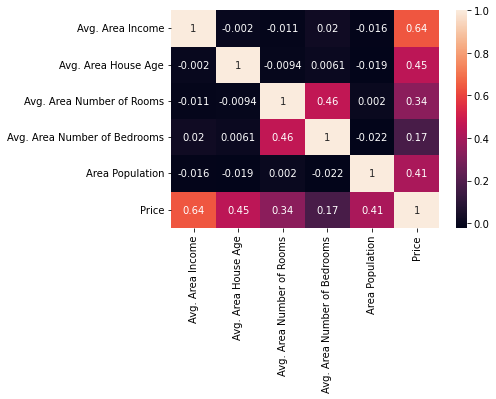

In [10]:
sns.heatmap(corr,annot=True)

# EDA:

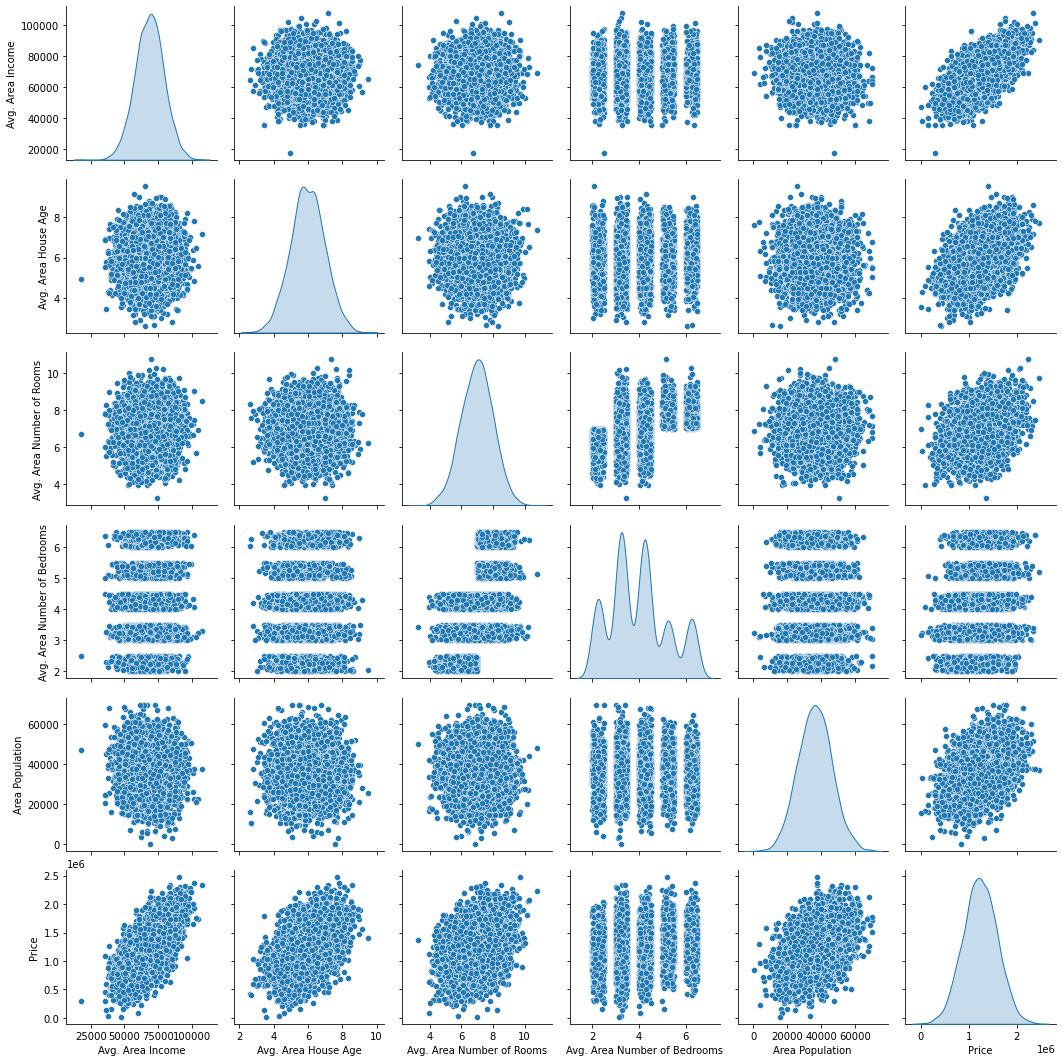

In [11]:
sns.pairplot(df,diag_kind = "kde",kind = "scatter")

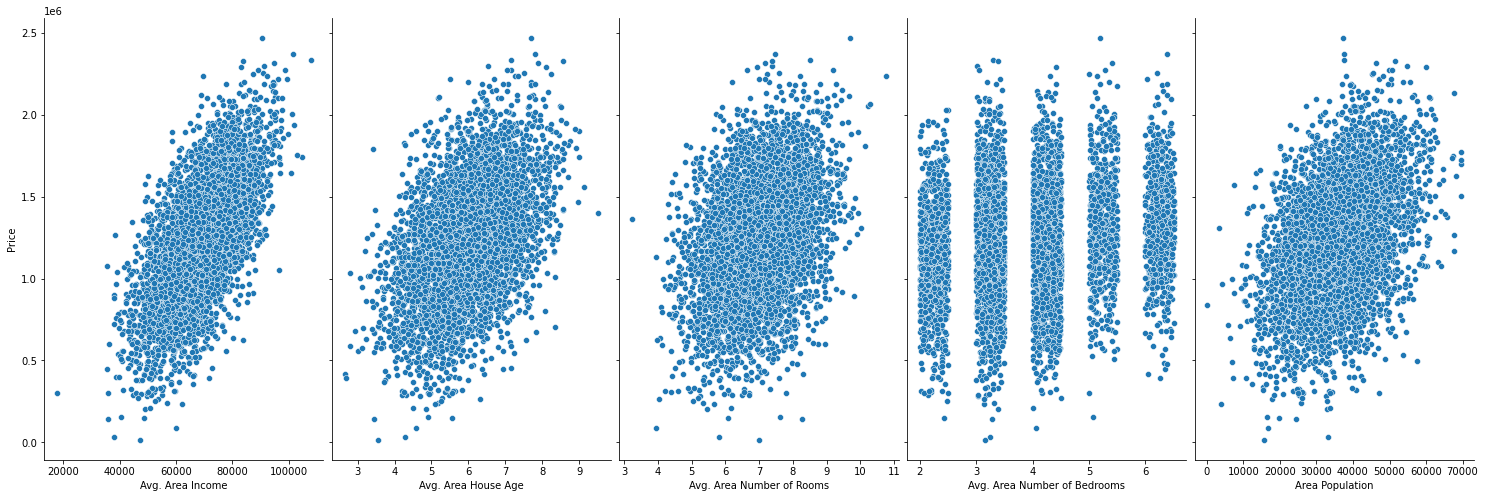

In [12]:
sns.pairplot(df,x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],y_vars=['Price'],height=7,aspect=0.6,kind='scatter')
plt.ylabel('Price')
plt.show()

In [13]:
#EXCEPT AVG.AREA NUMBER OF BEDROOMS, ALL THE OTHER FACTORS ARE MODERATELY POSITIVELY ASSOCIATED WITH PRICE

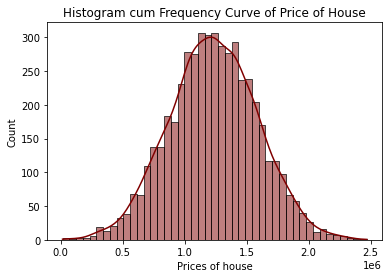

In [14]:
sns.histplot(df['Price'],color='maroon',kde='True')
plt.title('Histogram cum Frequency Curve of Price of House')
plt.xlabel('Prices of house')
plt.ylabel('Count')
plt.show()

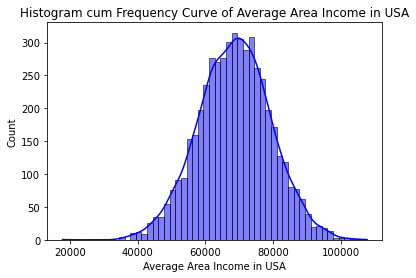

In [15]:
sns.histplot(df['Avg. Area Income'],kde='True',color='blue')
plt.title('Histogram cum Frequency Curve of Average Area Income in USA')
plt.xlabel('Average Area Income in USA')
plt.ylabel('Count')
plt.show()

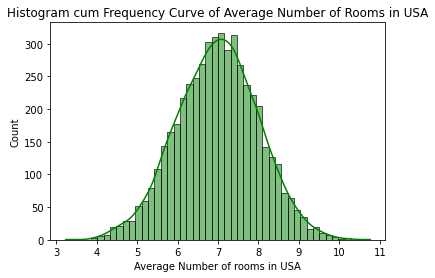

In [16]:
sns.histplot(df['Avg. Area Number of Rooms'],kde='True',color='green')
plt.title('Histogram cum Frequency Curve of Average Number of Rooms in USA')
plt.xlabel('Average Number of rooms in USA')
plt.ylabel('Count')
plt.show()

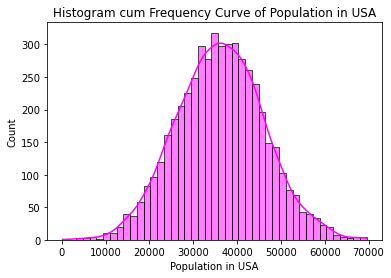

In [17]:
sns.histplot(df['Area Population'],kde='True',color='magenta')
plt.title('Histogram cum Frequency Curve of Population in USA')
plt.xlabel('Population in USA')
plt.ylabel('Count')
plt.show()

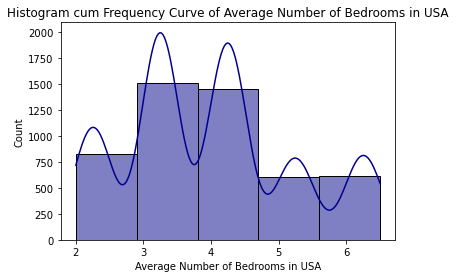

In [18]:
sns.histplot(df['Avg. Area Number of Bedrooms'],kde='True',color='darkblue',bins=5)
plt.title('Histogram cum Frequency Curve of Average Number of Bedrooms in USA')
plt.xlabel('Average Number of Bedrooms in USA')
plt.ylabel('Count')
plt.show()

# Simple Multiple linear Regression

In [19]:
reg=linear_model.LinearRegression() #FITTING
reg.fit(df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']],df.Price)

LinearRegression()

In [20]:
reg.coef_        #REGRESSION COEFFIECIENTS

array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

In [21]:
reg.intercept_    #REGRESSION INTERCEPTS

-2637299.033331735

# Model without training our data set:

In [22]:
def Model1(AreaIncome,AreaHouseAge,AvgNoRooms,AvgNoBed,AreaPopln):
    return (2.15780494e+01*AreaIncome+1.65637027e+05*AreaHouseAge+1.20659949e+05*AvgNoRooms+1.65113905e+03*AvgNoBed+1.52007439e+01*AreaPopln-2637299.033331735)


print(Model1(80000,6,7,4,23000))


1283608.389568265


# NOW WE TRAIN OUR MODEL:

# Training dataset:

In [23]:
#Standardizing our data as independent variables have different weightage and units:

In [24]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [25]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=df['Price']

In [26]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [27]:
X.head()               #Standardized X variables

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [28]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [29]:
#Training our data:

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3,random_state=2)
#We take 70% of data as our training set and rest as testing dataset

In [31]:
print(X_train.shape)           #Shape of Training Dataset:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train) #Fitting our data with respect to training X and y Variables

LinearRegression()

In [34]:
#Intercept and Coefficients of the standardized model:

In [35]:
print(reg.coef_)
print(reg.intercept_)

[229275.2240371  163592.48713934 120113.25335228   3015.8475684
 150556.34029689]
1231006.3190627624


# Standardized Model:

In [36]:
def model2(AreaIncome,AreaHouseAge,AvgNoRooms,AvgNoBed,AreaPopln):
    return (229275.2240371*AreaIncome+163592.48713934*AreaHouseAge+120113.25335228*AvgNoRooms+3015.8475684*AvgNoBed+150556.34029689*AreaPopln+1231006.3190627624)


print(model2(1.02,-0.3,0.02,0.088,-1.32))


1219722.5918999724


In [37]:
y_pred = reg.predict(X_test) #Predicting with respect to testing dataset

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [39]:
print('Mean_Squared_Error :' ,mse)        #Mean Squared Error
print('r_square_value :',r_squared)       #Performance Metrics of model:R square(showing 91.992% accuracy with high MSE)

Mean_Squared_Error : 9831074698.505754
r_square_value : 0.919928795973803


In [40]:
t=y[3500:5000]-y_pred

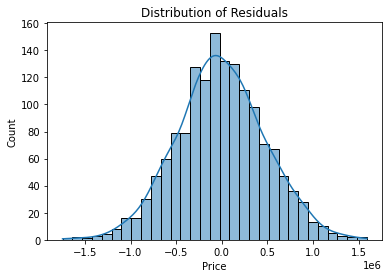

In [41]:
sns.histplot(t,kde='True')
plt.title('Distribution of Residuals')
plt.show()

# ROOT MEAN SQUARED ERROR:

In [42]:
from math import sqrt

rms = sqrt(mse)
rms

99151.77607338032

# MSE is high so we check further

In [43]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const    1.231006e+06
0        2.292752e+05
1        1.635925e+05
2        1.201133e+05
3        3.015848e+03
4        1.505563e+05
dtype: float64

In [44]:
#Ho:Coefficient is insignificant
#H1:Coefficient is significant

#We get that p-value>0.05, we rejected the coefficient for avg.no of bedrooms.

In [45]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7739.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:57:59   Log-Likelihood:                -45329.
No. Observations:                3500   AIC:                         9.067e+04
Df Residuals:                    3494   BIC:                         9.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.231e+06   1724.695    713.753      0.0

In [46]:
# So we drop Average Number of Bedrooms as it has p-value=0.123 and being insignificant
# Model having low auto correlation as Durbin-Watson:2.046 and low multicollinearity(Cond. No:1.65) 
# So we can leave the model as it is but we dropping Avg.Number of Bedrooms as it has a low coefficient
#as well as it is insignificant  

In [47]:
#Data without standardizing our variables:

In [48]:
X1=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y1=df['Price']

In [49]:
X1.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [50]:
y1.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7 ,test_size = 0.3,random_state=2)
#We take 70% of data as our training set and rest as testing dataset

In [52]:
print(X1_train.shape)  #Shape of training data
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(3500, 4)
(1500, 4)
(3500,)
(1500,)


In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [54]:
reg.fit(X1_train, y1_train)   #Fitting our data with respect to training X and y Variables

LinearRegression()

In [55]:
#Intercept and Coefficients of the standardized model:

In [56]:
print(reg.coef_)
print(reg.intercept_)

[2.15179145e+01 1.65028315e+05 1.20794172e+05 1.51626149e+01]
-2623603.8683841582


In [57]:
y1_pred = reg.predict(X1_test)    #Predicting with respect to testing dataset

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y1_test, y1_pred)
r_squared1 = r2_score(y1_test, y1_pred)

In [59]:
print('Mean_Squared_Error :' ,mse1)    #Mean Squared Error
print('r_square_value :',r_squared1)   #Performance Metrics of model:R square(showing 91.999% accuracy with relatively lower MSE)

Mean_Squared_Error : 9823431324.122814
r_square_value : 0.9199910490039582


# Root Mean Squared Error:

In [60]:
from math import sqrt

rms = sqrt(mse1)
rms

99113.22476906306

# Improved Model:
# Price=21.5179145 x AreaIncome + 165028.315 x AreaHouseAge +120794.172e+05 x AvgNoRooms+15.1626149 x AreaPopln -2623603.8683841582

# ROOT MEAN SQUARE : 99113.22476906306
# R_Square : 0.9199910490039582


In [66]:
def model3(AreaIncome,AreaHouseAge,AvgNoRooms,AreaPopln):
    return (2.15179145e+01* AreaIncome +  1.65028315e+05* AreaHouseAge +1.20794172e+05* AvgNoRooms+1.51626149e+01* AreaPopln -2623603.8683841582)


print(model3(80000,6,7,23000))


1282298.5283158412


In [62]:
z=y1[3500:5000]-y1_pred

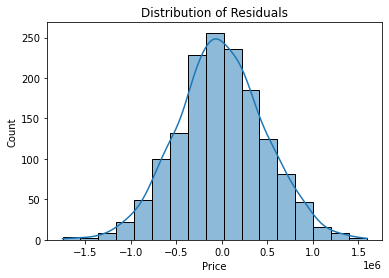

In [63]:
sns.histplot(z,bins=17,kde='True')
plt.title('Distribution of Residuals')
plt.show()

#The distribution of residuals follows normal distribution and hence the error of the data is homoscedastic